## Image Augmentation for ConvNets 

In [2]:
from keras.datasets import mnist 
from matplotlib import pyplot

Using TensorFlow backend.


In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K 
K.set_image_dim_ordering('th')

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

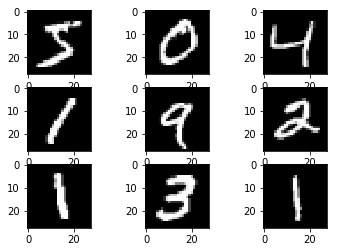

In [8]:
def show_images(x):
    for i in range(0,9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x[i], cmap=pyplot.get_cmap('gray'))    
    pyplot.show()
    
show_images(X_train)

C:\Users\vs76289\AppData\Local\Continuum\Anaconda3\envs\kdc\lib\site-packages\keras\preprocessing\image.py:648: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (60000, 1, 28, 28) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


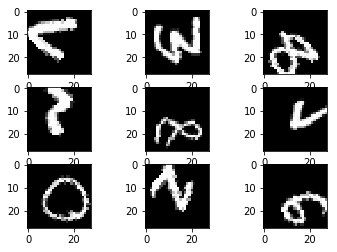

In [17]:
#### Feature Standardization 
def feature_standardization():
    X_train_fs = X_train.reshape(X_train.shape[0],1,28,28).astype('float32')
    X_test_fs = X_test.reshape(X_test.shape[0],1,28,28).astype('float32')
    
    datagen = ImageDataGenerator(featurewise_center = True,
                                 featurewise_std_normalization = True,
                                 #zca_whitening = True,
                                 rotation_range = 90,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 horizontal_flip = True,
                                 vertical_flip = True
                                )
    datagen.fit(X_train_fs)
    
    for X_batch, y_batch in datagen.flow(X_train_fs, y_train, batch_size=9):
        for i in range(0,9):
            pyplot.subplot(330 + 1 + i)
            pyplot.imshow(X_batch[i].reshape(28,28), cmap=pyplot.get_cmap('gray'))    
        pyplot.show()
        break

feature_standardization()